### Набор данных о видеоиграх.

Вопросы:

* Как критики относятся к спортивным играм?
* Критикам нравятся больше игры на PC или на PS4?
* Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

* сформулируем нулевую и альтернативную гипотезы;
* выберем пороговый уровень статистической значимости;
* опишем полученные результаты статистического теста.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Python\\Notebook\\statistics\\files\\video_games_sales.csv', sep=',')

In [3]:
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
df.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,55792.000000,0.0,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,799.000000
mean,27896.500000,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,7.425907
std,16105.907446,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,1.384226
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13948.750000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.800000
50%,27896.500000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.800000
75%,41844.250000,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55792.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


### Как критики относятся к спортивным играм?
H0: средняя оценка критиков по спортивным играм  <= 7 (учитывая среднюю оценку по всем играм 7,2, предположим что к спорт играм критики относятся примерно так же).

H1: средняя оценка критиков по спортивным играм  более 7.

За alpha здесь и далее будем принимать 0.05

In [5]:
df_sport = df[(df['Genre'] == 'Sports') & pd.notna(df['Critic_Score'])]
df_sport.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
16,17,Wii Fit,wii-fit,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.9,...,NaN,NaN,NaN,NaN,2008.0,NaN,http://www.vgchartz.com/game/7480/wii-fit/?reg...,1,8.0,/games/boxart/full_3619557AmericaFrontccc.jpg
17,18,Wii Fit Plus,wii-fit-plus,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35077/wii-fit-plu...,1,NaN,/games/boxart/full_2716475AmericaFrontccc.jpg
68,69,FIFA 18,fifa-18,Sports,E,PS4,EA Sports,EA Vancouver,NaN,8.3,...,1.27,8.64,0.15,1.73,2017.0,02nd Apr 18,http://www.vgchartz.com/game/180525/fifa-18/?r...,1,NaN,/games/boxart/full_5257064AmericaFrontccc.jpg


In [6]:
alpha = 0.05
result = stats.ttest_1samp(df_sport['Critic_Score'], 7)

print(df_sport['Critic_Score'].mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, средняя оценка критиков по спортивным играм более 7 баллов (им нравятся спорт игры).')
else:
    print('Не отвергаем нулевую нулевую гипотезу, средняя оценка критиков по спортивным играм менее 7 баллов (не очень нравятся).')

7.291424418604655
Ttest_1sampResult(statistic=5.197156914436623, pvalue=2.671410902970997e-07)
Отвергаем нулевую гипотезу, средняя оценка критиков по спортивным играм более 7 баллов (им нравятся спорт игры).


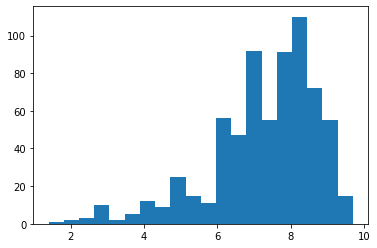

In [7]:
plt.hist(df_sport['Critic_Score'], bins=20);

### Вывод:
Значение статистики положительное, что значит средняя оценка больше константы (7 баллов). Значение р стремится к 0, что меньше нашего уровня значимости, это позволяет нам отвергнуть Н0. Также из гистограммы мы видим, что критики чаще всего ставят высокие оценки спортивным играм.

### Критикам нравятся больше игры на PC или на PS4?
H0: различие между оценками критиков играм на PC или на PS4 - статистически незначимо.

H1: статистически значимое различие есть.

In [8]:
df_pc = df[(df['Platform'] == 'PC') & pd.notna(df['Critic_Score'])]
df_pc.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png
36,37,Counter-Strike: Source,counter-strike-source,Shooter,M,PC,VU Games,Valve Software,NaN,9.3,...,NaN,NaN,NaN,NaN,2004.0,NaN,http://www.vgchartz.com/game/12531/counter-str...,1,NaN,/games/boxart/full_9030886AmericaFrontccc.jpg
55,56,Portal 2,portal-2,Shooter,E10,PC,Valve,Valve Software,NaN,9.7,...,NaN,NaN,NaN,NaN,2011.0,NaN,http://www.vgchartz.com/game/43865/portal-2/?r...,1,NaN,/games/boxart/full_portal-2_617AmericaFront.jpg
64,65,Diablo III,diablo-iii,Role-Playing,M,PC,Blizzard Entertainment,Blizzard Entertainment,NaN,9.0,...,NaN,NaN,NaN,NaN,2012.0,03rd Jan 18,http://www.vgchartz.com/game/24178/diablo-iii/...,1,8.4,/games/boxart/full_diablo-iii_550AmericaFront.jpg
75,76,Terraria,terraria,Platform,T,PC,Unknown,Re-Logic,NaN,8.8,...,NaN,NaN,NaN,NaN,2011.0,19th Mar 18,http://www.vgchartz.com/game/51349/terraria/?r...,1,NaN,/games/boxart/full_terraria_497AmericaFront.jpg


In [9]:
df_ps4 = df[(df['Platform'] == 'PS4') & pd.notna(df['Critic_Score'])]
df_ps4.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
20,21,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,NaN,9.7,...,6.06,9.71,0.60,3.02,2014.0,03rd Jan 18,http://www.vgchartz.com/game/83196/grand-theft...,1,NaN,/games/boxart/full_5563178AmericaFrontccc.jpg
45,46,Red Dead Redemption 2,red-dead-redemption-2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,NaN,9.8,...,5.26,6.21,0.21,2.26,2018.0,02nd Nov 18,http://www.vgchartz.com/game/140683/red-dead-r...,1,8.0,/games/boxart/full_4653215AmericaFrontccc.jpg
50,51,Call of Duty: WWII,call-of-duty-wwii,Shooter,M,PS4,Activision,Sledgehammer Games,NaN,8.0,...,4.67,6.21,0.40,2.12,2017.0,31st Dec 17,http://www.vgchartz.com/game/170599/call-of-du...,1,NaN,/games/boxart/full_4380292AmericaFrontccc.jpg
68,69,FIFA 18,fifa-18,Sports,E,PS4,EA Sports,EA Vancouver,NaN,8.3,...,1.27,8.64,0.15,1.73,2017.0,02nd Apr 18,http://www.vgchartz.com/game/180525/fifa-18/?r...,1,NaN,/games/boxart/full_5257064AmericaFrontccc.jpg
76,77,FIFA 17,fifa-17,Sports,E,PS4,Electronic Arts,EA Canada,NaN,8.9,...,1.26,7.95,0.12,1.61,2016.0,28th Mar 18,http://www.vgchartz.com/game/117272/fifa-17/?r...,1,NaN,/games/boxart/full_7661370AmericaFrontccc.jpg


In [10]:
# используем t-test Стьюдента
result = stats.ttest_ind(df_pc['Critic_Score'], df_ps4['Critic_Score'], equal_var=False)

print(df_pc['Critic_Score'].mean())
print(df_ps4['Critic_Score'].mean())
print(result)

alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по разному относятся к играм на PC или на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

7.541849710982658
7.904587155963299
Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Отвергаем нулевую гипотезу, критики по разному относятся к играм на PC или на PS4


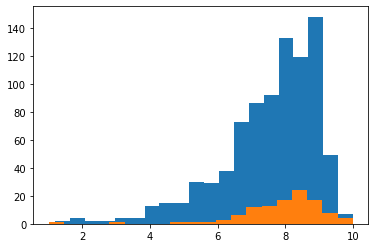

In [11]:
plt.hist(df_pc['Critic_Score'], bins=20);
plt.hist(df_ps4['Critic_Score'], bins=20);

### Вывод:
Исходя из значения р видим, что различие между оценками статистически значимое, а по среднему значению и значению статистики можем судить о том, что критикам нравятся больше игры на PS4.

### Критикам больше нравятся стрелялки или стратегии?
H0: различие между оценками критиков играм стрелялки или стратегии - статистически незначимо.

H1: статистически значимое различие есть.

In [12]:
df_shoot = df[(df['Genre'] == 'Shooter') & pd.notna(df['Critic_Score'])]
df_shoot.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
36,37,Counter-Strike: Source,counter-strike-source,Shooter,M,PC,VU Games,Valve Software,NaN,9.3,...,NaN,NaN,NaN,NaN,2004.0,NaN,http://www.vgchartz.com/game/12531/counter-str...,1,NaN,/games/boxart/full_9030886AmericaFrontccc.jpg
40,41,Call of Duty: Modern Warfare 3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,Infinity Ward,NaN,8.7,...,9.07,4.29,0.13,1.33,2011.0,NaN,http://www.vgchartz.com/game/44606/call-of-dut...,1,NaN,/games/boxart/full_call-of-duty-modern-warfare...
41,42,Call of Duty: Black Ops,call-of-duty-black-ops,Shooter,M,X360,Activision,Treyarch,NaN,8.8,...,9.76,3.73,0.11,1.14,2010.0,NaN,http://www.vgchartz.com/game/44952/call-of-dut...,1,NaN,/games/boxart/full_call-of-duty-black-ops_5Ame...
43,44,Halo 3,halo-3,Shooter,M,X360,Microsoft Game Studios,Bungie Studios,NaN,9.6,...,NaN,NaN,NaN,NaN,2007.0,11th Oct 18,http://www.vgchartz.com/game/6964/halo-3/?regi...,1,8.8,/games/boxart/full_8373567AmericaFrontccc.jpg
49,50,Call of Duty: Modern Warfare 2,call-of-duty-modern-warfare-2,Shooter,M,X360,Activision,Infinity Ward,NaN,9.5,...,8.54,3.63,0.08,1.28,2009.0,NaN,http://www.vgchartz.com/game/28848/call-of-dut...,1,9.0,/games/boxart/full_809251AmericaFrontccc.jpg


In [13]:
df_strat = df[(df['Genre'] == 'Strategy') & pd.notna(df['Critic_Score'])]
df_strat.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
86,87,RollerCoaster Tycoon 3,rollercoaster-tycoon-3,Strategy,E,PC,Atari,Frontier Developments,NaN,8.3,...,NaN,NaN,NaN,NaN,2004.0,NaN,http://www.vgchartz.com/game/7415/rollercoaste...,1,NaN,/games/boxart/full_6560922AmericaFrontccc.jpg
92,93,StarCraft,starcraft,Strategy,T,PC,Blizzard Entertainment,Blizzard Entertainment,NaN,8.7,...,NaN,NaN,NaN,NaN,1998.0,23rd Nov 18,http://www.vgchartz.com/game/7214/starcraft/?r...,1,NaN,/games/boxart/3959329ccc.jpg
210,211,Pokemon Stadium,pokemon-stadium,Strategy,E,N64,Nintendo,HAL Laboratory,NaN,7.5,...,NaN,NaN,NaN,NaN,2000.0,NaN,http://www.vgchartz.com/game/1767/pokemon-stad...,1,NaN,/games/boxart/full_6051233AmericaFrontccc.jpg
305,306,StarCraft II: Wings of Liberty,starcraft-ii-wings-of-liberty,Strategy,T,PC,Blizzard Entertainment,Blizzard Entertainment,NaN,9.3,...,NaN,NaN,NaN,NaN,2010.0,25th Jun 18,http://www.vgchartz.com/game/13820/starcraft-i...,1,8.9,/games/boxart/full_starcraft-ii-wings-of-liber...
306,307,Warcraft III: Reign of Chaos,warcraft-iii-reign-of-chaos,Strategy,T,PC,Blizzard Entertainment,Blizzard Entertainment,NaN,9.3,...,NaN,NaN,NaN,NaN,2002.0,23rd Nov 18,http://www.vgchartz.com/game/7195/warcraft-iii...,1,NaN,/games/boxart/full_6504358AmericaFrontccc.jpg


In [14]:
# используем t-test Стьюдента
result = stats.ttest_ind(df_shoot['Critic_Score'], df_strat['Critic_Score'], equal_var=False)

print(df_shoot['Critic_Score'].mean())
print(df_strat['Critic_Score'].mean())
print(result)

alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по разному относятся к играм на PC или на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

7.2868327402135264
7.429268292682925
Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Не отвергаем нулевую гипотезу


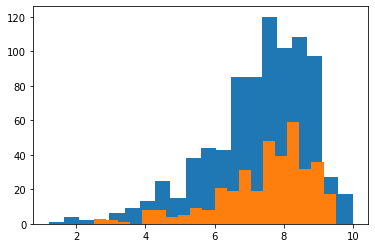

In [15]:
plt.hist(df_shoot['Critic_Score'], bins=20);
plt.hist(df_strat['Critic_Score'], bins=20);

In [16]:
from scipy.stats import f_oneway

In [17]:
F, p = f_oneway(df_shoot['Critic_Score'], df_strat['Critic_Score'])  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

2.439466575651572 0.11857794193336453
Одинаковое распределение (не отвергаем H0)


### Выводы:
После проведенного теста Стьюдента и дисперсионного анализа видим, что выборки имеют одинаковое распределение и мы не можем отвергнуть нулевую гипотезу. Различие между оценками критиков - статистически незначимо, им одинаково нравятся стрелялки и стратегии.